# Prepare data

In [1]:
import pandas as pd
import numpy as np
train_dataset = pd.read_csv("Car_TRAIN.txt", sep = ' ', header = None)
test_dataset = pd.read_csv("Car_TEST.txt", sep = ' ', header = None)

In [2]:
x1 = train_dataset.shape[0]
y1 = train_dataset.shape[1]
train_col = train_dataset.shape[1] - 1
y_train = train_dataset[y1 - 1]
train_data = train_dataset[0 : y1 - 1]

x2 = test_dataset.shape[0]
y2 = test_dataset.shape[1]
y_test= test_dataset[y2 - 1]
test_data = test_dataset[0 : y2 - 1]

In [3]:
def normalize(data):
    data -= np.mean(data, axis=0)
    data /= np.std(data, axis=0)
    return data
x_train = normalize(train_data).values.reshape( x1, y1, 1)
x_test = normalize(test_data).values.reshape(x2, y2, 1)

# CNN Training

In [4]:
import tensorflow as  tf
from tensorflow.keras import layers, models

Hyperparameters

In [6]:
# batch_size = 600
# seq_len = 128
# learning_rate = 0.001
# epchos = 1000

# n_classes = 5
# n_channels = 1

Convolutional And Pooling Layers

In [7]:
model = models.Sequential()

model.add(layers.Conv1D(100, kernel_size=3, padding='same', input_shape=(y1, 1)))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(160, 2))
model.add(layers.MaxPooling1D(3))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 578, 100)          400       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 289, 100)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 288, 160)          32160     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 96, 160)           0         
Total params: 32,560
Trainable params: 32,560
Non-trainable params: 0
_________________________________________________________________


Feature Layers

In [8]:
model.add(layers.Flatten())
model.add(layers.Dense(x1, activation = 'relu'))
model.add(layers.Dense(x1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 578, 100)          400       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 289, 100)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 288, 160)          32160     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 96, 160)           0         
_________________________________________________________________
flatten (Flatten)            (None, 15360)             0         
_________________________________________________________________
dense (Dense)                (None, 60)                921660    
_________________________________________________________________
dense_1 (Dense)              (None, 60)                3

Model Compile

In [9]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 578, 100)          400       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 289, 100)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 288, 160)          32160     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 96, 160)           0         
_________________________________________________________________
flatten (Flatten)            (None, 15360)             0         
_________________________________________________________________
dense (Dense)                (None, 60)                921660    
_________________________________________________________________
dense_1 (Dense)              (None, 60)                3

Model Training

In [16]:
y_train = np.array(y_train)
y_test = np.array(y_test)
history = model.fit(x_train, y_train, epochs=100,
                   validation_data = (x_test, y_test))

Train on 60 samples, validate on 60 samples
Epoch 1/100
60/60 [==============================] - 0s 2ms/sample - loss: 0.0017 - accuracy: 1.0000 - val_loss: 2.4953 - val_accuracy: 0.8000
Epoch 2/100
60/60 [==============================] - 0s 3ms/sample - loss: 0.0014 - accuracy: 1.0000 - val_loss: 2.5407 - val_accuracy: 0.8000
Epoch 3/100
60/60 [==============================] - 0s 2ms/sample - loss: 0.0011 - accuracy: 1.0000 - val_loss: 2.5784 - val_accuracy: 0.8000
Epoch 4/100
60/60 [==============================] - 0s 2ms/sample - loss: 9.3035e-04 - accuracy: 1.0000 - val_loss: 2.6089 - val_accuracy: 0.8000
Epoch 5/100
60/60 [==============================] - 0s 2ms/sample - loss: 7.7562e-04 - accuracy: 1.0000 - val_loss: 2.6348 - val_accuracy: 0.8000
Epoch 6/100
60/60 [==============================] - 0s 2ms/sample - loss: 6.7062e-04 - accuracy: 1.0000 - val_loss: 2.6555 - val_accuracy: 0.8000
Epoch 7/100
60/60 [==============================] - 0s 2ms/sample - loss: 5.9277e-04 

Result Visualization

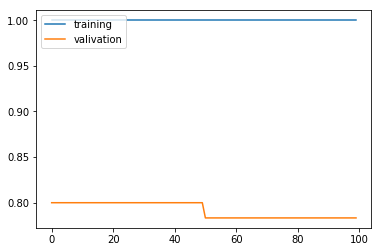

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'valivation'], loc='upper left')
plt.show()

Model Assessment

In [18]:
loss, accuracy = model.evaluate(x_test, y_test)
loss
accuracy

60/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.78333336